# Pymaceuticals Inc.
---

### Analysis

These analyses provide insights into the tumor volume data, treatment regimens, gender distribution, and potential relationships between variables. They assist in understanding the dataset and drawing conclusions related to the effectiveness of specific treatment regimens and the impact of weight on tumor volume.
 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_meta_data_merged = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_meta_data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [190]:
# Checking the number of mice.
mouse_count = len(mouse_meta_data_merged["Mouse ID"].unique())
mouse_count

249

In [191]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_count = mouse_meta_data_merged.duplicated(subset=["Mouse ID", "Timepoint"]).sum()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_list = mouse_meta_data_merged[mouse_meta_data_merged.duplicated(subset=["Mouse ID", "Timepoint"])]['Mouse ID'].unique()
duplicate_mice_list

array(['g989'], dtype=object)

In [192]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_meta_data_merged[mouse_meta_data_merged.duplicated(["Mouse ID", "Timepoint"])]
all_data_for_duplicate = mouse_meta_data_merged[mouse_meta_data_merged["Mouse ID"] == duplicates.iloc[0]["Mouse ID"]]
all_data_for_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [193]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_meta_data_merged.drop_duplicates(subset='Mouse ID', keep='first')
cleaned_df
#cleaned_data_merged = mouse_meta_data_merged.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")
#cleaned_mouse_count = len(cleaned_data_merged["Mouse ID"].unique())
#cleaned_mouse_count

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [194]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_df["Mouse ID"].unique())
cleaned_mouse_count

249

## Summary Statistics

In [195]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned_data_merged.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']
median = cleaned_data_merged.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']
variance = cleaned_data_merged.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']
standard_deviation = cleaned_data_merged.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']
sem = cleaned_data_merged.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.

data = {
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev': standard_deviation,
    'Tumor Volume Std.Err.': sem
}

summary_table = pd.DataFrame(data)
summary_table



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [196]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = cleaned_data_merged.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)
summary_table

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

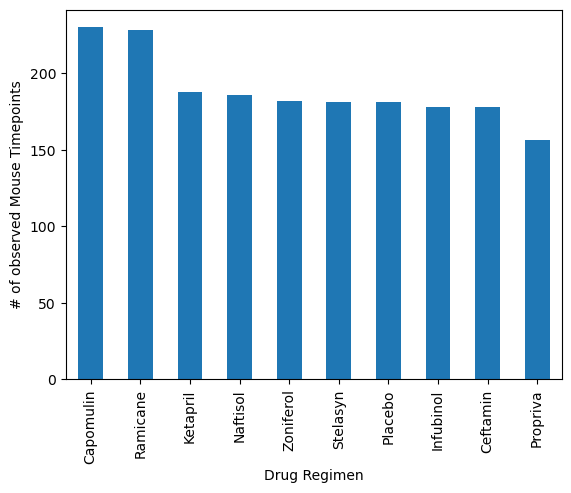

In [197]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleaned_data_merged['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of observed Mouse Timepoints")
plt.show()

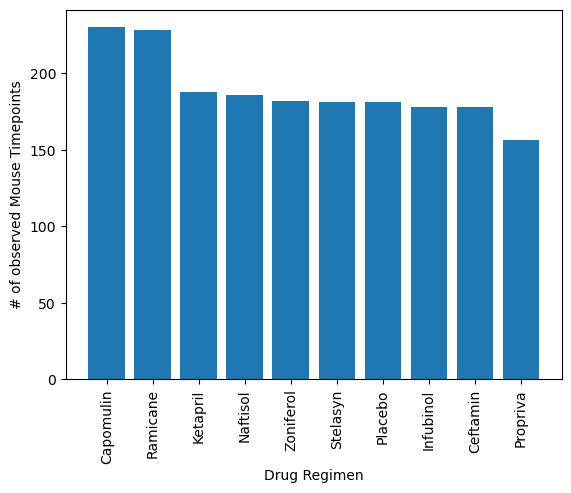

In [198]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = cleaned_data_merged['Drug Regimen'].value_counts()
plt.bar(drug_counts.index, drug_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

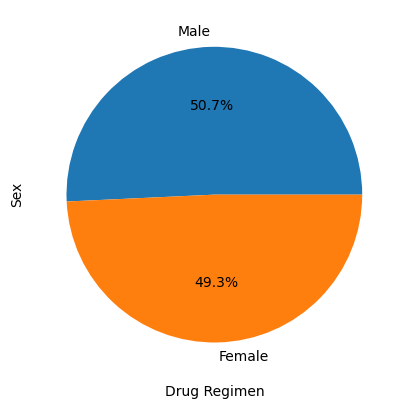

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data_merged['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%',)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Sex")
plt.show()

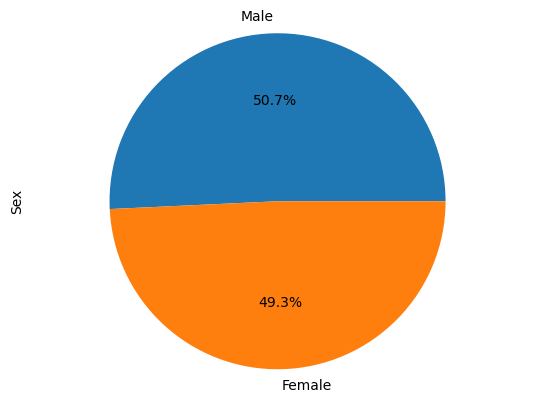

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = cleaned_data_merged['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [201]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_data_merged[cleaned_data_merged['Drug Regimen'].isin(treatment_regimens)]
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volume_df = pd.merge(filtered_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data_merged.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge the last_timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_data_merged, on=['Mouse ID', 'Timepoint'], how='inner')


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df['Drug Regimen'].unique().tolist()

# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Calculate the IQR and quantitatively determine potential outliers for each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartile_1 = tumor_volumes.quantile(0.25)
    quartile_3 = tumor_volumes.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
       
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")  
    


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


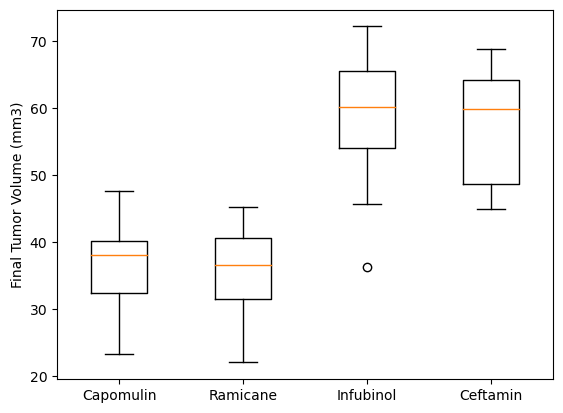

In [203]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

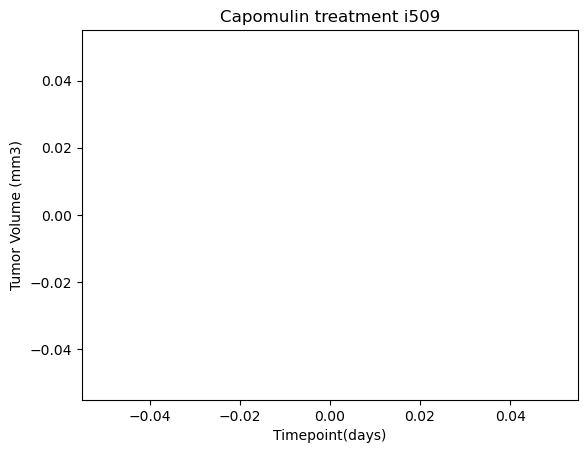

In [204]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
def get_line_plot(regimen, mouse_id):
    regimen_data = merged_df.loc[merged_df["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint' + "(days)")
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " treatment " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "i509")



C:\Users\tungaa\AppData\Local\Temp\ipykernel_31336\573624208.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages = regimen_data.groupby(['Mouse ID']).mean()


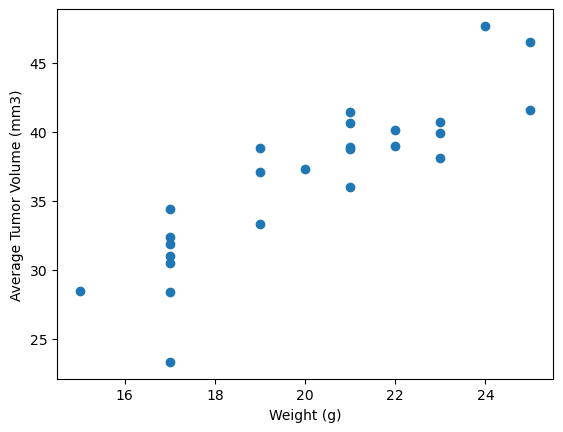

In [205]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
def generate_scatter_plot(regimen):
    regimen_data = merged_df.loc[merged_df['Drug Regimen'] == regimen]
    averages = regimen_data.groupby(['Mouse ID']).mean()
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()
    return averages
cap_averages = generate_scatter_plot("Capomulin")

## Correlation and Regression

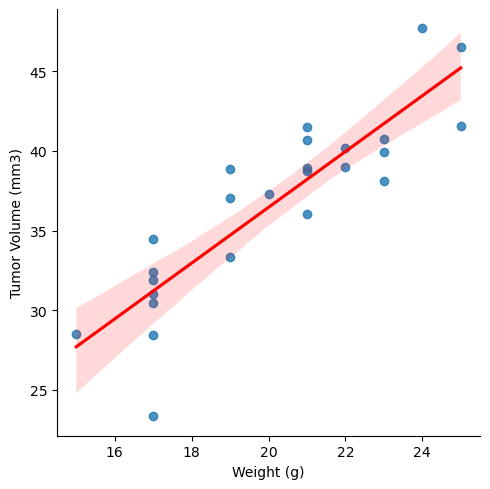

In [209]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
coefficient = sns.lmplot(x='Weight (g)', y='Tumor Volume (mm3)', data=cap_averages, fit_reg=True, line_kws={'color': 'red'})
plt.show()